In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sms
import os
import inspect

In [2]:
fname='../Data_In/ISTART_Combined_PersonalityData_020722.xlsx'
df=pd.read_excel(fname)
df = df[['participant_id','gender','SPSRWD', 'BISBAS_BAS', 'SPSRWD.1', 'BISBAS_BAS.1','BISBAS_BAS_Quintiles', 'SPSRWD_Quintiles', 'QUIN_DIFF']]
bas_qcut=pd.to_numeric(pd.cut(
    df['BISBAS_BAS.1'],bins=[0,34,37,39,42,100],
    labels=[1,2,3,4,5],include_lowest=True))

spsq_qcut=pd.to_numeric(pd.cut(
    df['SPSRWD.1'],bins=[0,8,11,13.6845, 16.6957,100],
    labels=[1,2,3,4,5],include_lowest=True))

df['BISBAS_BAS_Q.1']=bas_qcut
df['SPSRWD_Q.1']=spsq_qcut
df['QuinDiff.1']=df['BISBAS_BAS_Q.1']-df['SPSRWD_Q.1']
df['RS_Sum']=df['BISBAS_BAS.1']+df['SPSRWD.1']

#Remove counter rows
p_idToremove=['N Missing', 'N per column']
df.replace(to_replace=999, value=np.nan,inplace=True)
df = df[df.participant_id.isin(p_idToremove) == False]
df.head()

,participant_id,gender,SPSRWD,BISBAS_BAS,SPSRWD.1,BISBAS_BAS.1,BISBAS_BAS_Quintiles,SPSRWD_Quintiles,QUIN_DIFF,BISBAS_BAS_Q.1,SPSRWD_Q.1,QuinDiff.1,RS_Sum
0,1001,1,41.0,44.0,7.0,44.0,5,5.0,0.0,5,1,4,51.0
1,1002,2,33.0,35.0,15.0,35.0,2,2.0,0.0,2,4,-2,50.0
2,1003,1,42.0,45.0,6.0,45.0,5,5.0,0.0,5,1,4,51.0
3,1004,1,14.0,39.0,14.0,39.0,4,4.0,0.0,3,4,-1,53.0
4,1006,2,12.0,37.0,12.0,37.0,3,3.0,0.0,2,3,-1,49.0


,gender,SPSRWD,BISBAS_BAS,SPSRWD.1,BISBAS_BAS.1,BISBAS_BAS_Quintiles,SPSRWD_Quintiles,QUIN_DIFF,BISBAS_BAS_Q.1,SPSRWD_Q.1,QuinDiff.1,RS_Sum
gender,1.000000,0.098596,-0.062904,0.126618,-0.088311,-0.009669,0.107621,-0.237624,-0.088298,0.141022,-0.268129,0.008784
SPSRWD,0.098596,1.000000,0.074672,-0.148400,-0.209165,0.067583,0.554094,-0.092702,-0.185785,-0.217998,0.028178,-0.198468
BISBAS_BAS,-0.062904,0.074672,1.000000,0.634012,0.917155,0.906164,0.807275,0.352355,0.862328,0.599824,0.343364,0.862082
SPSRWD.1,0.126618,-0.148400,0.634012,1.000000,0.676969,0.637191,0.747241,-0.014545,0.634014,0.957904,-0.342387,0.896545
BISBAS_BAS.1,-0.088311,-0.209165,0.917155,0.676969,1.000000,0.814639,0.807275,0.352355,0.908738,0.663307,0.325938,0.932951
BISBAS_BAS_Quintiles,-0.009669,0.067583,0.906164,0.637191,0.814639,1.000000,0.880203,0.410917,0.864853,0.624527,0.317963,0.801939
SPSRWD_Quintiles,0.107621,0.554094,0.807275,0.747241,0.807275,0.880203,1.000000,-0.070988,0.821482,0.728440,0.147403,0.853882
QUIN_DIFF,-0.237624,-0.092702,0.352355,-0.014545,0.352355,0.410917,-0.070988,1.000000,0.355463,0.020916,0.392489,0.202772
BISBAS_BAS_Q.1,-0.088298,-0.185785,0.862328,0.634014,0.908738,0.864853,0.821482,0.355463,1.000000,0.638362,0.464038,0.857017
SPSRWD_Q.1,0.141022,-0.217998,0.599824,0.957904,0.663307,0.624527,0.728440,0.020916,0.638362,1.000000,-0.385620,0.867732


<AxesSubplot:>

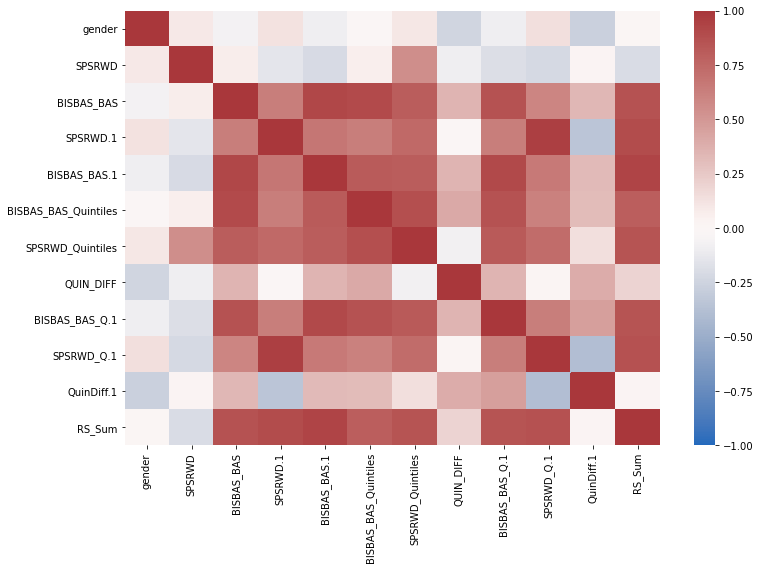

In [3]:
cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)



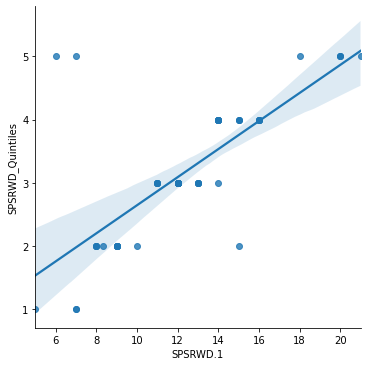

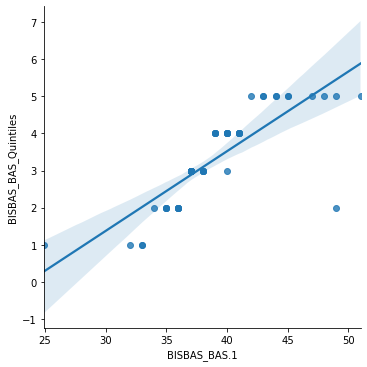

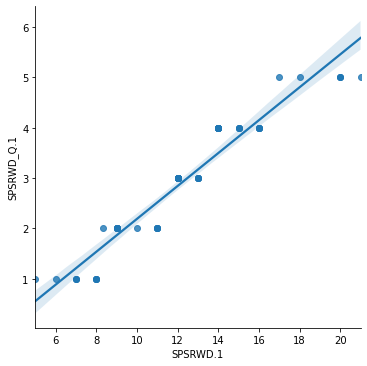

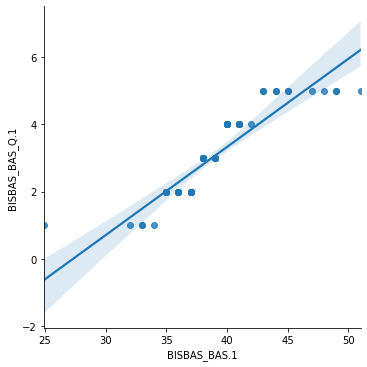

In [4]:
g=sms.lmplot(x='SPSRWD.1',y='SPSRWD_Quintiles',data=df)
plt.show()
g=sms.lmplot(x='BISBAS_BAS.1',y='BISBAS_BAS_Quintiles',data=df)
plt.show()
g=sms.lmplot(x='SPSRWD.1',y='SPSRWD_Q.1',data=df)
plt.show()
g=sms.lmplot(x='BISBAS_BAS.1',y='BISBAS_BAS_Q.1',data=df)
plt.show()

Correlation between reward sensitivity is 
 R^2: 0.4582872755754281 p: 1.5333008566420115e-09


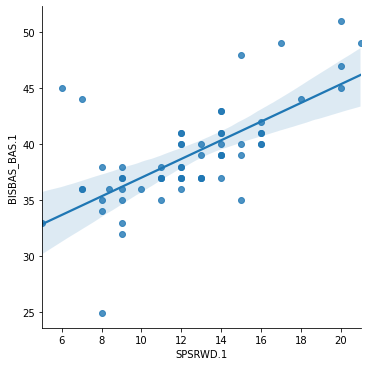

<class 'seaborn.axisgrid.FacetGrid'>


In [5]:
r,p=stats.pearsonr(df['SPSRWD.1'],df['BISBAS_BAS.1'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='SPSRWD.1',y='BISBAS_BAS.1',data=df)
plt.show()
print(type(g))


## composite raw included

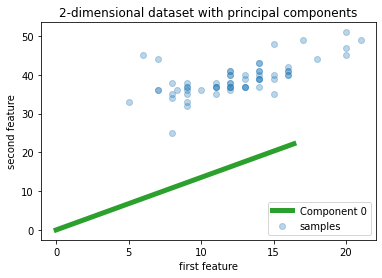

In [6]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
pca=PCA(n_components=1)

features=['SPSRWD.1','BISBAS_BAS.1']
X = df.loc[:, features].values
PC1=pca.fit_transform(X)

df['PC1_raw_included']=PC1
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()


## composite zscore included

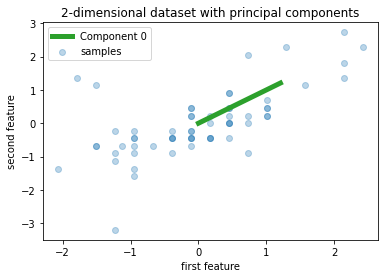

In [7]:
features=['SPSRWD.1','BISBAS_BAS.1']
X = df.loc[:, features].apply(zscore).values
PC1=pca.fit_transform(X)


df['PC1_score_included']=PC1

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

Correlation between reward sensitivity is 
 R^2: 0.9880895899979261 p: 1.9560220980791162e-59


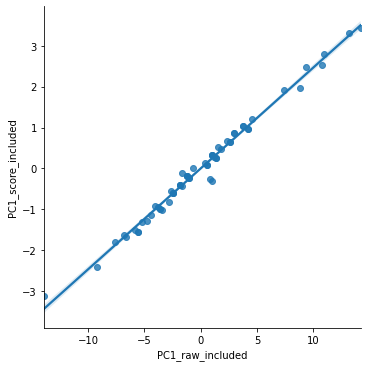

<class 'seaborn.axisgrid.FacetGrid'>


In [8]:
df.head()
r,p=stats.pearsonr(df['PC1_raw_included'],df['PC1_score_included'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='PC1_raw_included',y='PC1_score_included',data=df)
plt.show()
print(type(g))

## composite raw excluded

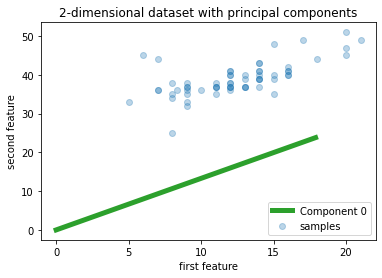

In [9]:
ex_df=df[np.abs(df['QuinDiff.1'])<=1]

features=['SPSRWD.1','BISBAS_BAS.1']
X = ex_df.loc[:, features].values
pca.fit(X)

X = df.loc[:, features].values
PC1=pca.transform(X)
df['PC1_raw_excluded']=PC1
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

## composite zscore excluded

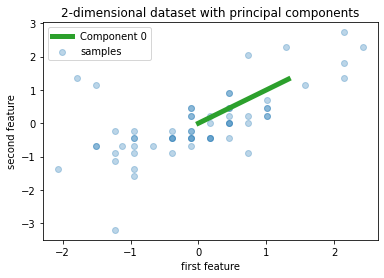

In [10]:
ex_df=df[np.abs(df['QuinDiff.1'])<=1]

features=['SPSRWD.1','BISBAS_BAS.1']
X = ex_df.loc[:, features].apply(zscore).values
pca.fit(X)

X = df.loc[:, features].apply(zscore).values
PC1=pca.transform(X)
df['PC1_score_excluded']=PC1
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

Correlation between reward sensitivity is 
 R^2: 0.9888853289926454 p: 2.456414553170082e-60


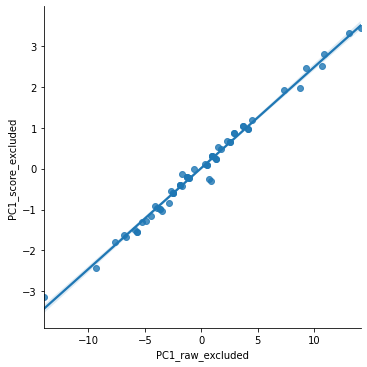

<class 'seaborn.axisgrid.FacetGrid'>


In [11]:
df.head()
r,p=stats.pearsonr(df['PC1_raw_excluded'],df['PC1_score_excluded'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='PC1_raw_excluded',y='PC1_score_excluded',data=df)
plt.show()
print(type(g))

Correlation between reward sensitivity is 
 R^2: 1.0 p: 0.0


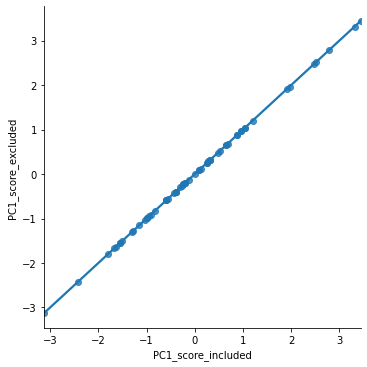

<class 'seaborn.axisgrid.FacetGrid'>


In [12]:
df.head()
r,p=stats.pearsonr(df['PC1_score_included'],df['PC1_score_excluded'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='PC1_score_included',y='PC1_score_excluded',data=df)
plt.show()
print(type(g))

,gender,SPSRWD,BISBAS_BAS,SPSRWD.1,BISBAS_BAS.1,BISBAS_BAS_Quintiles,SPSRWD_Quintiles,QUIN_DIFF,BISBAS_BAS_Q.1,SPSRWD_Q.1,QuinDiff.1,RS_Sum,PC1_raw_included,PC1_score_included,PC1_raw_excluded,PC1_score_excluded
gender,1.000000,0.098596,-0.062904,0.126618,-0.088311,-0.009669,0.107621,-0.237624,-0.088298,0.141022,-0.268129,0.008784,-0.008390,0.020917,-0.007390,0.020917
SPSRWD,0.098596,1.000000,0.074672,-0.148400,-0.209165,0.067583,0.554094,-0.092702,-0.185785,-0.217998,0.028178,-0.198468,-0.202328,-0.195244,-0.202126,-0.195244
BISBAS_BAS,-0.062904,0.074672,1.000000,0.634012,0.917155,0.906164,0.807275,0.352355,0.862328,0.599824,0.343364,0.862082,0.880381,0.846995,0.879413,0.846995
SPSRWD.1,0.126618,-0.148400,0.634012,1.000000,0.676969,0.637191,0.747241,-0.014545,0.634014,0.957904,-0.342387,0.896545,0.866358,0.915688,0.868215,0.915688
BISBAS_BAS.1,-0.088311,-0.209165,0.917155,0.676969,1.000000,0.814639,0.807275,0.352355,0.908738,0.663307,0.325938,0.932951,0.954079,0.915688,0.952955,0.915688
BISBAS_BAS_Quintiles,-0.009669,0.067583,0.906164,0.637191,0.814639,1.000000,0.880203,0.410917,0.864853,0.624527,0.317963,0.801939,0.812112,0.792753,0.811610,0.792753
SPSRWD_Quintiles,0.107621,0.554094,0.807275,0.747241,0.807275,0.880203,1.000000,-0.070988,0.821482,0.728440,0.147403,0.853882,0.854634,0.851138,0.854692,0.851138
QUIN_DIFF,-0.237624,-0.092702,0.352355,-0.014545,0.352355,0.410917,-0.070988,1.000000,0.355463,0.020916,0.392489,0.202772,0.231302,0.182136,0.229663,0.182136
BISBAS_BAS_Q.1,-0.088298,-0.185785,0.862328,0.634014,0.908738,0.864853,0.821482,0.355463,1.000000,0.638362,0.464038,0.857017,0.874670,0.842400,0.873739,0.842400
SPSRWD_Q.1,0.141022,-0.217998,0.599824,0.957904,0.663307,0.624527,0.728440,0.020916,0.638362,1.000000,-0.385620,0.867732,0.839955,0.885242,0.841668,0.885242


<AxesSubplot:>

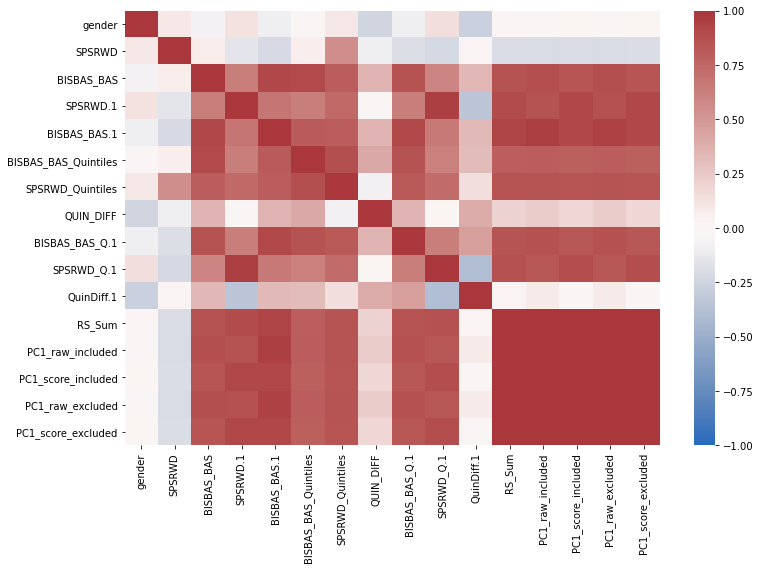

In [13]:
cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)


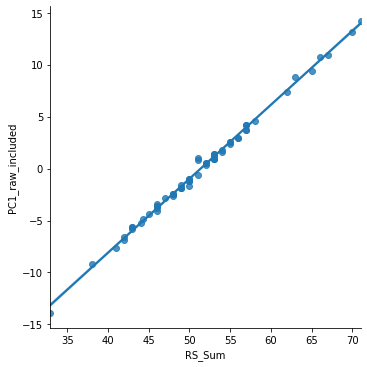

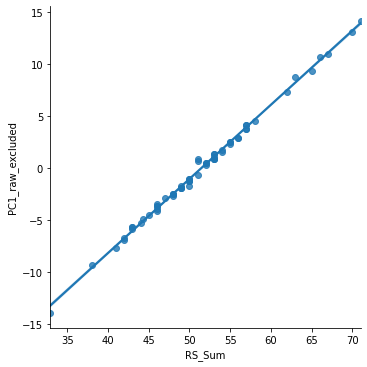

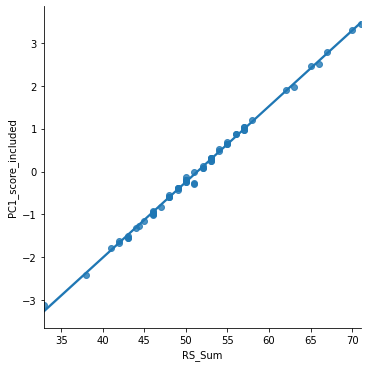

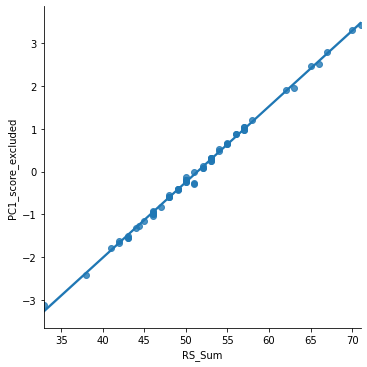

In [14]:
g=sms.lmplot(x='RS_Sum',y='PC1_raw_included',data=df)
plt.show()
g=sms.lmplot(x='RS_Sum',y='PC1_raw_excluded',data=df)
plt.show()
g=sms.lmplot(x='RS_Sum',y='PC1_score_included',data=df)
plt.show()
g=sms.lmplot(x='RS_Sum',y='PC1_score_excluded',data=df)
plt.show()